In [1]:
# cells_meta_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor0/cloneMethod_variants_init_knn_resolution_3/clonalShift_method_clones/cells_meta.tsv"
# indir = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/multiplex/clones_init/donor0"
# outdir = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor0/cloneMethod_variants_init_knn_resolution_3/clonalShift_method_clones/top/scrap"
# clone_order_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor0/cloneMethod_variants_init_knn_resolution_3/clonalShift_method_clones/clones_ranked/cloneID_rank_ncells.txt"


cells_meta_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/single_clones/donor0/cloneMethod_variants_init_knn_resolution_30/clonalShift_method_clones/cells_meta.tsv"
indir = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/clones/variants_init/knn/kparam_30"
outdir = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/single_clones/donor0/cloneMethod_variants_init_knn_resolution_30/clonalShift_method_clones/top"
clone_order_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/single_clones/donor0/cloneMethod_variants_init_knn_resolution_30/clonalShift_method_clones/clones_ranked/cloneID_rank_ncells.txt"


ntop_clones = 10
af_thresh = 0.001
cov_thresh = 2
ntop_vars=10

mt_ref="/data/Mito_Trace/data/processed/genomes/mtMasked/GRCh38_MT_blacklist_A2_2020/chrM.fasta"



In [2]:
import src.utils.variant_utils as vu
from collections import OrderedDict
from matplotlib.lines import Line2D
from os.path import join, exists, dirname
from glob import glob
import pickle
import mplh.cluster_help as ch
import mplh.fig_utils as fu

import os
import vireoSNP
import numpy as np
from scipy import sparse
from scipy.io import mmread
import matplotlib.pyplot as plt
from scipy.stats import hypergeom
print(vireoSNP.__version__)

import pandas as pd
import seaborn as sns
from vireoSNP import Vireo
np.set_printoptions(formatter={'float': lambda x: format(x, '.5f')})

plt.rcParams['svg.fonttype'] = 'none'

fig_utils from mplh
0.5.6


In [3]:
import seaborn as sns
from mplh import cluster_help as ch
from src.utils.data_io import reverse_ids


In [4]:
clone_order = pd.read_csv(clone_order_f, header=None)[0].values
top_clones = clone_order[:ntop_clones]
top_clones

array(['0_5', '0_15', '0_19', '0_20', '0_21', '0_23', '0_22', '0_24',
       '0_25', '0_27'], dtype=object)

In [5]:
clone_order

array(['0_5', '0_15', '0_19', '0_20', '0_21', '0_23', '0_22', '0_24',
       '0_25', '0_27', '0_28', '0_29', '0_30', '0_32', '0_31', '0_33'],
      dtype=object)

In [6]:
#af_indir = join(indir, "sc_af", f"donor{DONOR}")
af_indir = indir

AF_df = pd.read_csv(join(af_indir, "af.tsv"), index_col=0, sep="\t")
DP_df = pd.read_csv(join(af_indir, "dp.tsv"), index_col=0, sep="\t")


#out_f = join(outdir, f"donor{DONOR}")


In [7]:
AF_df.head()

,11251G,11453A,13368A,14233G,14905A,152C,15452A,16294T,16296T,1888A,...,15297C,16355T,16362C,204C,2442C,3847C,58C,64T,8292A,8461T
AAACGAAAGCGAGAAA-1_Control,0.0,0.0,0.0,0.0,0.000000,0.0,0.071429,0.00000,0.00000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAACGAATCAGGCGCT-1_Control,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.09375,0.09375,0.028571,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAACTCGCATGCACTA-1_Control,0.0,0.0,0.0,0.0,0.064516,0.0,0.000000,0.00000,0.00000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAACTGCCAAGAGATT-1_Control,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.00000,0.095238,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAAGATGAGTAGAAGG-1_Control,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.00000,0.142857,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#donor_vars = AF_df>0.9

In [9]:
cells_meta = pd.read_csv(cells_meta_f,sep="\t", index_col=0)
cells_meta = reverse_ids(cells_meta)
cells_meta

,cloneID,clusterID,condition,donor
AAACGAAAGCGAGAAA-1_Control,0_27,MPP/CMP/GMP C,Control,0
AAACGAATCAGGCGCT-1_Control,0_23,macrophage,Control,0
AAACTCGCATGCACTA-1_Control,0_15,MPP/CMP/GMP C,Control,0
AAACTGCCAAGAGATT-1_Control,0_21,neutrophil,Control,0
AAAGATGAGTAGAAGG-1_Control,0_24,macrophage,Control,0
...,...,...,...,...
TTTGGTTTCGGGAAAC-1_Input,0_20,MPP/CMP/GMP B,Input,0
TTTGGTTTCTGAGTCA-1_Input,0_23,MPP/CMP/GMP B,Input,0
TTTGTGTGTAGGGTCA-1_Input,0_5,MPP/CMP/GMP B,Input,0
TTTGTGTTCGGGAAAC-1_Input,0_25,MPP/CMP/GMP B,Input,0


## Get donor-specific variants

In [10]:
def get_high_variants(df, thresh, pct_thresh):
    """ Remove rows that have an average higher than threshold

    :param df:
    :param thresh:
    :return:
    """
    n_pct = pct_thresh*df.shape[0]
    return df.loc[:,((df>thresh).sum()>n_pct)].columns.values


donor_vars = get_high_variants(AF_df, thresh=0.8, pct_thresh=0.9)
print(f"number of donor vars: {len(donor_vars)}")

if len(donor_vars)>1:
    g = sns.clustermap(AF_df.loc[:, donor_vars])
    g.fig.savefig(fname=join(outdir, f"donor_variants.pdf"))
#plt.savefig(join(outdir, "donor_vars.png"))

number of donor vars: 0


## variant types

In [11]:
AF_df.columns

Index(['11251G', '11453A', '13368A', '14233G', '14905A', '152C', '15452A',
       '16294T', '16296T', '1888A', '1949A', '3109C', '4117C', '5147A',
       '10397G', '10589A', '11761T', '13188T', '15297C', '16355T', '16362C',
       '204C', '2442C', '3847C', '58C', '64T', '8292A', '8461T'],
      dtype='object')

In [12]:
# Get variant types
variants_df = vu.add_ref_to_variants(variants=AF_df.columns.values,
                                     mt_df=vu.load_mt_ref(mt_ref))

variants_df = vu.type_of_variants(variants_df, to_preproc=False)

In [13]:
variants_df.head()

,pos,ref,alt,variant type,variant change
11251G,11251,A,G,Transition,A>G
11453A,11453,G,A,Transition,G>A
13368A,13368,G,A,Transition,G>A
14233G,14233,A,G,Transition,A>G
14905A,14905,G,A,Transition,G>A


## Filter for clone

In [14]:
AF_df = AF_df.transpose()
DP_df = DP_df.transpose()

In [15]:
AF_df.head()

,AAACGAAAGCGAGAAA-1_Control,AAACGAATCAGGCGCT-1_Control,AAACTCGCATGCACTA-1_Control,AAACTGCCAAGAGATT-1_Control,AAAGATGAGTAGAAGG-1_Control,AAAGATGCAAAGAGAG-1_Control,AAAGGATAGATAGGTT-1_Control,AAAGGATGTGGAGTGT-1_Control,AAAGGGCGTGATGCGA-1_Control,AAAGGGCTCAGTGGTT-1_Control,...,TTGTTGTGTTCGGGAA-1_Input,TTTGAGGAGCTACGCC-1_Input,TTTGAGGCACCGAAAG-1_Input,TTTGCGCAGTGTCGGA-1_Input,TTTGGCCAGAGGAATG-1_Input,TTTGGCCGTATATGGA-1_Input,TTTGGTTTCCAGAATC-1_Input,TTTGTGTAGGTTGTTC-1_Input,TTTGTGTCAAGCCAGA-1_Input,TTTGTGTCATAGCCAT-1_Input
11251G,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11453A,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.577778,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13368A,0.0,0.0,0.000000,0.0,0.0,0.0,0.068966,0.000000,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14233G,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.222222,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14905A,0.0,0.0,0.064516,0.0,0.0,0.0,0.000000,0.000000,0.1,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
sum(AF_df.index.str.contains('\.'))

0

## Remove donor-specific variants

In [17]:
# Remove Donor variannts
AF_df = AF_df.loc[~(AF_df.index.isin(donor_vars))]
DP_df = DP_df.loc[AF_df.index, AF_df.columns] 

# Figure: 1: barplot for each clone, where x=Variant, and the % of cells (and raw) in the clone that has the variant and % of cells from other clone with variant


In [18]:
top_cells_meta = cells_meta[cells_meta["cloneID"].isin(top_clones)] 
top_cells_meta

,cloneID,clusterID,condition,donor
AAACGAAAGCGAGAAA-1_Control,0_27,MPP/CMP/GMP C,Control,0
AAACGAATCAGGCGCT-1_Control,0_23,macrophage,Control,0
AAACTCGCATGCACTA-1_Control,0_15,MPP/CMP/GMP C,Control,0
AAACTGCCAAGAGATT-1_Control,0_21,neutrophil,Control,0
AAAGATGAGTAGAAGG-1_Control,0_24,macrophage,Control,0
...,...,...,...,...
TTTGGTTTCGGGAAAC-1_Input,0_20,MPP/CMP/GMP B,Input,0
TTTGGTTTCTGAGTCA-1_Input,0_23,MPP/CMP/GMP B,Input,0
TTTGTGTGTAGGGTCA-1_Input,0_5,MPP/CMP/GMP B,Input,0
TTTGTGTTCGGGAAAC-1_Input,0_25,MPP/CMP/GMP B,Input,0


In [19]:
bin_AF_df = (AF_df > af_thresh) & (DP_df > cov_thresh)
bin_AF_df

,AAACGAAAGCGAGAAA-1_Control,AAACGAATCAGGCGCT-1_Control,AAACTCGCATGCACTA-1_Control,AAACTGCCAAGAGATT-1_Control,AAAGATGAGTAGAAGG-1_Control,AAAGATGCAAAGAGAG-1_Control,AAAGGATAGATAGGTT-1_Control,AAAGGATGTGGAGTGT-1_Control,AAAGGGCGTGATGCGA-1_Control,AAAGGGCTCAGTGGTT-1_Control,...,TTGTTGTGTTCGGGAA-1_Input,TTTGAGGAGCTACGCC-1_Input,TTTGAGGCACCGAAAG-1_Input,TTTGCGCAGTGTCGGA-1_Input,TTTGGCCAGAGGAATG-1_Input,TTTGGCCGTATATGGA-1_Input,TTTGGTTTCCAGAATC-1_Input,TTTGTGTAGGTTGTTC-1_Input,TTTGTGTCAAGCCAGA-1_Input,TTTGTGTCATAGCCAT-1_Input
11251G,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11453A,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
13368A,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14233G,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
14905A,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
152C,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15452A,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16294T,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16296T,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1888A,False,True,False,True,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


## Create variant-clone (and non-clone) percent of cells in clone with variant

In [20]:
def calc_clone_pct(data, **kwargs):
    curr_AF_df = bin_AF_df.loc[:,data.index]
    other_curr_AF_df = bin_AF_df.loc[:, ~(bin_AF_df.columns.isin(data.index))]
    
    curr_AF_tot = curr_AF_df.sum(axis=1)
    curr_AF_pct = 100*curr_AF_tot/curr_AF_df.shape[1]
    
    other_curr_AF_tot = other_curr_AF_df.sum(axis=1)
    other_curr_AF_pct = 100*other_curr_AF_tot/other_curr_AF_df.shape[1]
        
    return pd.concat((pd.DataFrame(curr_AF_pct).rename({0:"clone_pct"}, axis=1),
               pd.DataFrame(other_curr_AF_pct).rename({0:"other_clone_pct"}, axis=1)),axis=1, 
             ignore_index=False).rename_axis("variant")
    

pct_clones_df = top_cells_meta.groupby("cloneID").apply(calc_clone_pct).reset_index()
pct_clones_df

,cloneID,variant,clone_pct,other_clone_pct
0,0_15,11251G,4.932735,5.967814
1,0_15,11453A,0.896861,3.844435
2,0_15,13368A,6.278027,5.029057
3,0_15,14233G,6.726457,5.721949
4,0_15,14905A,11.210762,5.498435
...,...,...,...,...
275,0_5,3847C,0.000000,9.517241
276,0_5,58C,0.000000,7.103448
277,0_5,64T,0.000000,6.758621
278,0_5,8292A,0.000000,7.310345


## Rank variants for each clone by sorting by mannwhitneyu test of allele-frequency


In [21]:
from scipy.stats import mannwhitneyu

In [22]:
def rank_unique_vars_clone_af(clone_cells):
    clones_af = AF_df.loc[:, clone_cells.index].fillna(0)
#     print('clones_af')
#     print(clones_af)
    other_clones_af = AF_df.loc[:, ~(AF_df.columns.isin(clone_cells.index))].fillna(0)
#     print('other_clones_af')
#     print(other_clones_af)
    pvals = mannwhitneyu(clones_af, other_clones_af, alternative='greater', axis=1).pvalue
    rankings = pd.DataFrame(index=clones_af.index,data=pvals).rank(method="min").rename({0:"rank"}, axis=1) # np.argsort(pvals)
    #print(type(rankings))
    #print('rankings', rankings)

    rankings["pval"] = pvals
    rankings["rank"]= rankings["rank"].astype('int')
    #print('rankings', rankings)
    #print('rankings', rankings.head())
    rankings.index.name = "variant"
    return rankings

pvals_df = cells_meta.groupby("cloneID").apply(rank_unique_vars_clone_af).reset_index()
pvals_df

,cloneID,variant,rank,pval
0,0_15,11251G,9,0.776875
1,0_15,11453A,13,0.988614
2,0_15,13368A,3,0.237196
3,0_15,14233G,4,0.314145
4,0_15,14905A,2,0.000398
...,...,...,...,...
443,0_5,3847C,28,1.000000
444,0_5,58C,21,1.000000
445,0_5,64T,20,1.000000
446,0_5,8292A,23,1.000000


In [23]:
pct_pvals_df = pd.merge(pct_clones_df, pvals_df, on=["cloneID", "variant"])
pct_pvals_df

,cloneID,variant,clone_pct,other_clone_pct,rank,pval
0,0_15,11251G,4.932735,5.967814,9,0.776875
1,0_15,11453A,0.896861,3.844435,13,0.988614
2,0_15,13368A,6.278027,5.029057,3,0.237196
3,0_15,14233G,6.726457,5.721949,4,0.314145
4,0_15,14905A,11.210762,5.498435,2,0.000398
...,...,...,...,...,...,...
275,0_5,3847C,0.000000,9.517241,28,1.000000
276,0_5,58C,0.000000,7.103448,21,1.000000
277,0_5,64T,0.000000,6.758621,20,1.000000
278,0_5,8292A,0.000000,7.310345,23,1.000000


In [24]:
# pct_pvals_df["variant type"] = pct_pvals_df["variant"].apply(lambda x: variants_df.loc[x, "variant type"])
# pct_pvals_df["variant change"] = pct_pvals_df["variant"].apply(lambda x: variants_df.loc[x, "variant change"])
# pct_pvals_df["variant type"] = ["Ts" if x =="Transition" else "Tv" for x in pct_pvals_df["variant type"].values]
# pct_pvals_df

In [25]:
pct_clones_df["variant type"] = pct_clones_df["variant"].apply(lambda x: variants_df.loc[x, "variant type"])
#pct_clones_df["variant change"] = pct_clones_df["variant"].apply(lambda x: variants_df.loc[x, "variant change"])
#pct_clones_df["variant type"] = ["Ts" if x =="Transition" else "Tv" for x in pct_clones_df["variant type"].values]

In [26]:
pct_clones_df.groupby(["cloneID", "variant type"]).size()

cloneID  variant type
0_15     Transition      27
         Transversion     1
0_19     Transition      27
         Transversion     1
0_20     Transition      27
         Transversion     1
0_21     Transition      27
         Transversion     1
0_22     Transition      27
         Transversion     1
0_23     Transition      27
         Transversion     1
0_24     Transition      27
         Transversion     1
0_25     Transition      27
         Transversion     1
0_27     Transition      27
         Transversion     1
0_5      Transition      27
         Transversion     1
dtype: int64

In [27]:
def plot_pct_bar(data, **kwargs):
    ntop_vars = kwargs.get("ntop_vars", 0)
    data = data.set_index("variant")
    if ntop_vars != 0:
        data = data[data['rank']<ntop_vars].sort_values("rank")
        ax = data[["clone_pct", "other_clone_pct"]].plot.bar(ax=plt.gca())
        plt.gca().set_ylabel("% cells with variant")
            
    else:
        data = data.loc[(data["clone_pct"]-data["other_clone_pct"]).sort_values()[::-1].index]
        #print(data[data==0].head())
        #data = data.sort_values("clone_pct")[::-1]
        #print(data["clone_pct"]-data["other_clone_pct"])
        
        var_type_leg_order = OrderedDict()
        for vt in data["variant type"].values:
            var_type_leg_order[vt] = True
        var_type_leg_order = list(var_type_leg_order.keys())
        

        colors = ["blue" if i == "Transition" else "green" for i in data["variant type"].values]
        #ax = pd.DataFrame((data["clone_pct"]-data["other_clone_pct"])).plot.bar(ax=plt.gca())
        
        plt.gca().bar(x=data.index, 
                height = (data["clone_pct"].fillna(0)-data["other_clone_pct"].fillna(0)).values,
                color=colors, label=data["variant type"].values)
        plt.xticks(rotation=90)
        plt.gca().set_ylabel("(% cells in clone with variant) - (%cells not in clone with variant)")
        custom_lines = [Line2D([0], [0], color="blue", lw=4),
                        Line2D([0], [0], color="green", lw=4)]
        plt.gca().legend(custom_lines, ['Transition', 'Transversion'], loc='best')
        
        #ax.set_label()
        #plt.bar(data, vals, width, color=colors)
        #plt.gca().legend(loc='best') 
    return

## Figure: Barplot of percent in clone vs percent not in clone

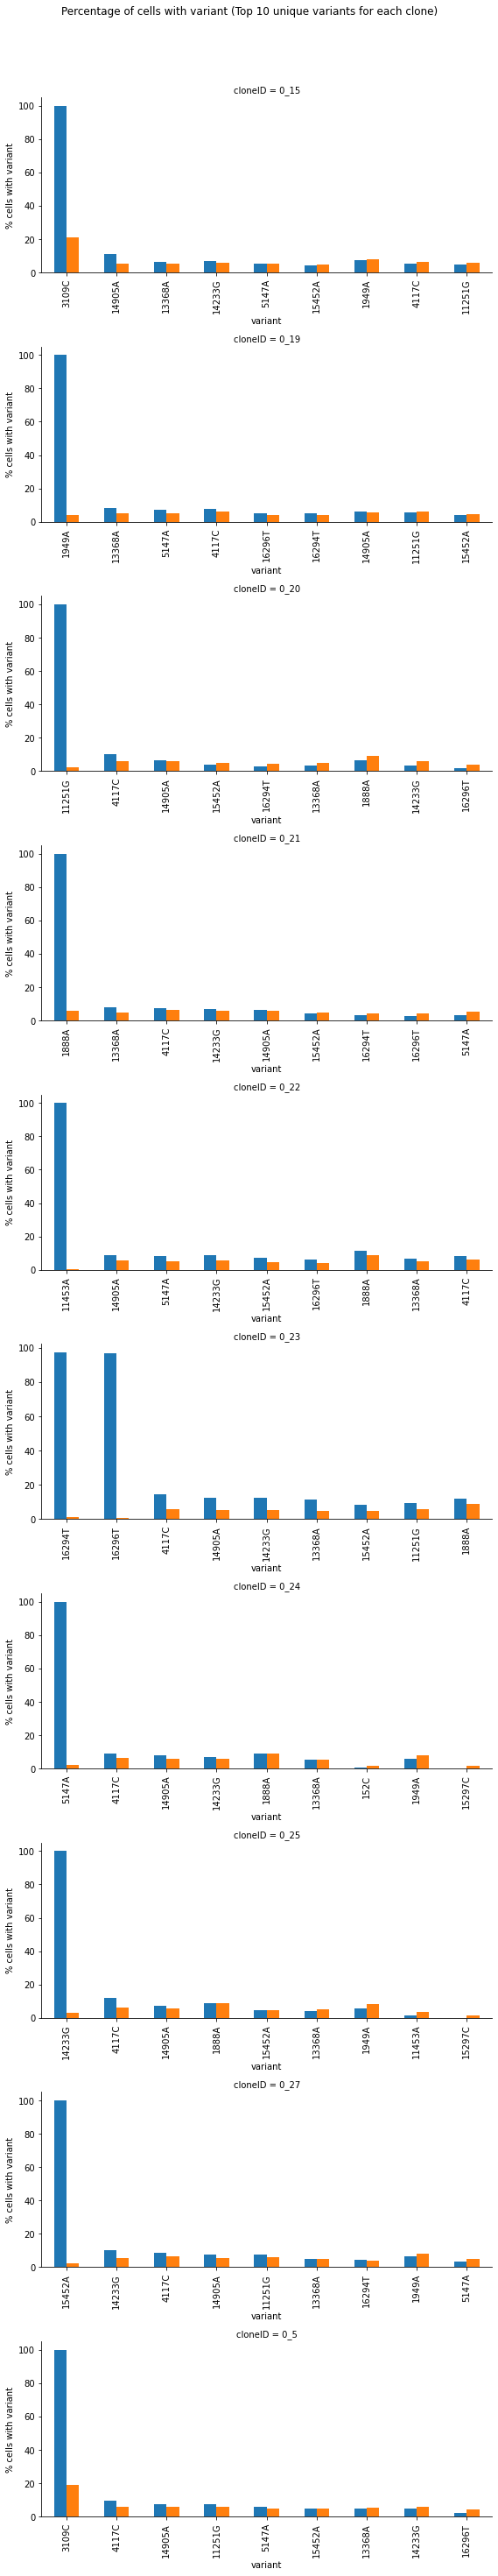

In [28]:
g = sns.FacetGrid(data=pct_pvals_df, col = "cloneID", col_wrap=1, height=4, aspect=2,
                 sharex=False, sharey=False)
g.map_dataframe(plot_pct_bar, ntop_vars=ntop_vars)
g.fig.suptitle(f"Percentage of cells with variant (Top {ntop_vars} unique variants for each clone)", y=1.02)
g.fig.savefig(fname=join(outdir, f"top_variants_distinct_pct_vs_other.pdf"), dpi=500, bbox_inches='tight', pad_inches=0.5)
g.fig.savefig(fname=join(outdir, f"top_variants_distinct_pct_vs_other.svg"), dpi=500, bbox_inches='tight', pad_inches=0.5)

plt.tight_layout()


## Figure: Barplot of percent in clone - percent not in clone. Showing for all variants

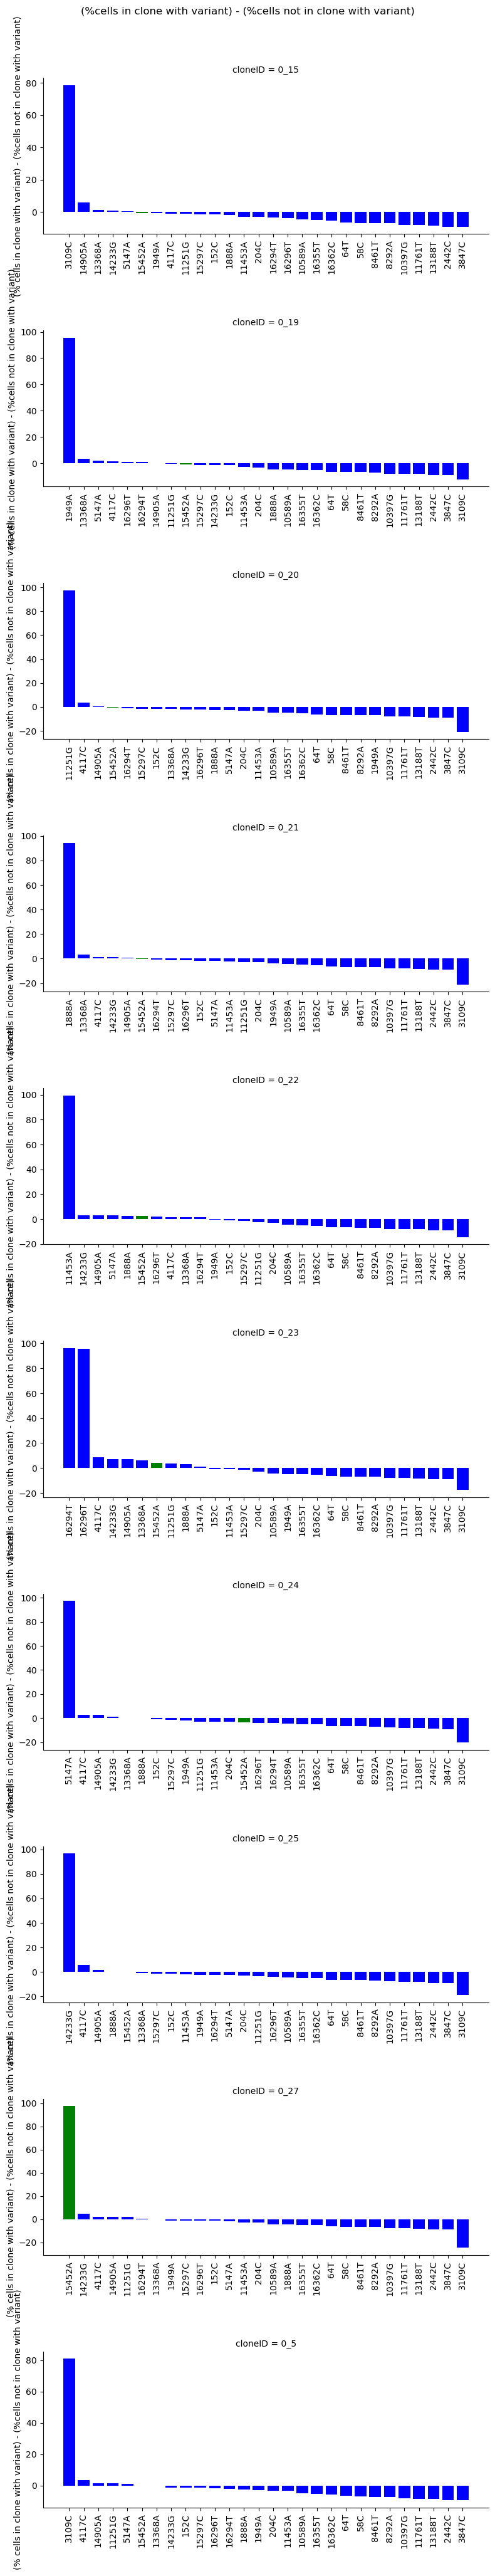

In [29]:
g = sns.FacetGrid(data=pct_clones_df, col = "cloneID", col_wrap=1, height=4, aspect=2,
                 sharex=False, sharey=False)
g.map_dataframe(plot_pct_bar)
#g.fig.legend()
#g.add_legend(["Transition", "Transversion"])
plt.tight_layout()
g.fig.suptitle("(%cells in clone with variant) - (%cells not in clone with variant)", y=1.02)
g.fig.savefig(fname=join(outdir, f"top_variants_pct_minus_other.pdf"), dpi=500, bbox_inches='tight', pad_inches=0.5)
g.fig.savefig(fname=join(outdir, f"top_variants_pct_minus_other.svg"), dpi=500, bbox_inches='tight', pad_inches=0.5)




In [30]:
def plot_violin(data, **kwargs):
    ntop_vars = kwargs.get("ntop_vars", 0)
    curr_clone = data["cloneID"].values[0]
    print('curr_clone', curr_clone)
    curr_AF_df = AF_df.loc[:,data.index]
    other_curr_AF_df = AF_df.loc[:, ~(AF_df.columns.isin(data.index))]
    
    curr_AF_df = curr_AF_df.reset_index().melt(id_vars='index', var_name="cell", value_name="AF")
    curr_AF_df["type"] = "clone"
    
    other_curr_AF_df = other_curr_AF_df.reset_index().melt(id_vars='index', var_name="cell", value_name="AF")
    other_curr_AF_df["type"] = "other"
    curr_merge_df = pd.concat((curr_AF_df, other_curr_AF_df), axis=0)
    curr_merge_df = curr_merge_df.rename({"index":"variant"}, axis=1)
    #print(curr_merge_df.head())
    if ntop_vars != 0:
        #print(pct_pvals_df[(pct_pvals_df["cloneID"]==curr_clone)])
        if pct_pvals_df[(pct_pvals_df["cloneID"]==curr_clone)].shape[0] == 0:
            return
        curr_top_vars = pct_pvals_df[(pct_pvals_df["cloneID"]==curr_clone) & (pct_pvals_df["rank"]<=ntop_vars)].sort_values("rank")["variant"].values
        print('top vars', curr_top_vars)
        #print('before top vars',curr_merge_df.shape)
        curr_merge_df = curr_merge_df[curr_merge_df["variant"].isin(curr_top_vars)] #data[data['rank']<ntop_vars].sort_values("rank")
        #print('after top vars',curr_merge_df.shape)
        
    sns.boxenplot(data=curr_merge_df, x="variant", y="AF", hue="type", ax=plt.gca())
    return 
    

## Violin plots for Allele frequency

curr_clone 0_5
top vars ['3109C' '4117C' '14905A' '11251G' '5147A' '15452A' '13368A' '14233G'
 '16296T' '16294T']
curr_clone 0_15
top vars ['3109C' '14905A' '13368A' '14233G' '5147A' '15452A' '1949A' '4117C'
 '11251G' '1888A']
curr_clone 0_19
top vars ['1949A' '13368A' '5147A' '4117C' '16296T' '16294T' '14905A' '11251G'
 '15452A' '14233G']
curr_clone 0_20
top vars ['11251G' '4117C' '14905A' '15452A' '16294T' '13368A' '1888A' '14233G'
 '16296T' '15297C']
curr_clone 0_21
top vars ['1888A' '13368A' '4117C' '14233G' '14905A' '15452A' '16294T' '16296T'
 '5147A' '11251G']
curr_clone 0_23
top vars ['16294T' '16296T' '4117C' '14905A' '14233G' '13368A' '15452A' '11251G'
 '1888A' '5147A']
curr_clone 0_22
top vars ['11453A' '14905A' '5147A' '14233G' '15452A' '16296T' '1888A' '13368A'
 '4117C' '16294T']
curr_clone 0_24
top vars ['5147A' '4117C' '14905A' '14233G' '1888A' '13368A' '152C' '1949A'
 '15297C' '11251G']
curr_clone 0_25
top vars ['14233G' '4117C' '14905A' '1888A' '15452A' '13368A' '1949A'

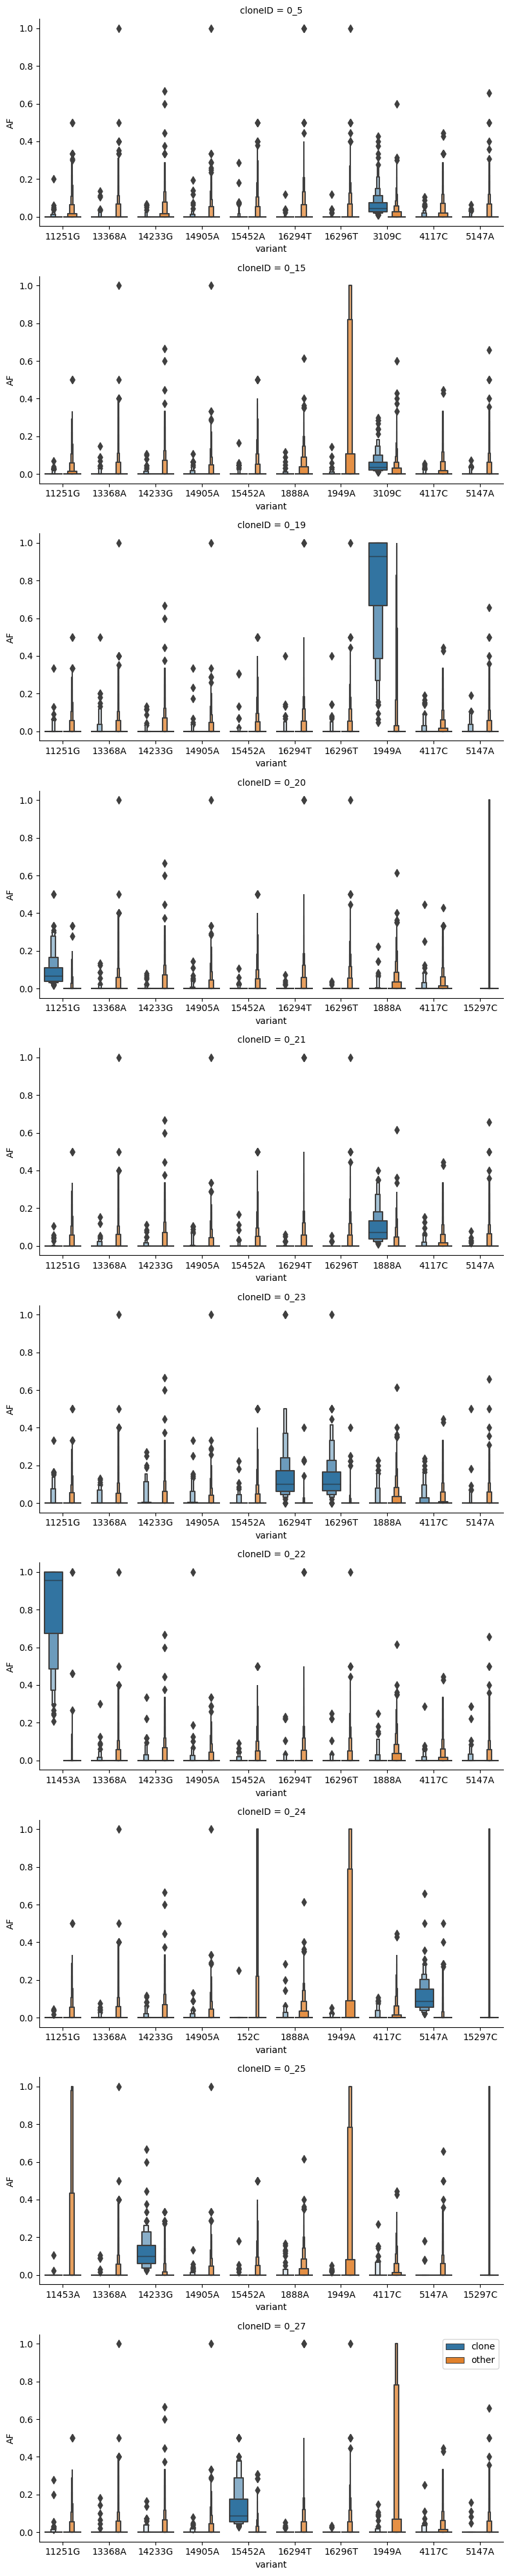

In [31]:
g = sns.FacetGrid(data=cells_meta, col="cloneID", col_order=top_clones, col_wrap=1, height=4, aspect=2, sharex=False, sharey=False)
g.map_dataframe(plot_violin, ntop_vars=10 )
plt.legend(loc='upper right')
g.fig.savefig(fname=join(outdir, f"top_variants_in_clone_af_boxen.pdf"), dpi=500, bbox_inches='tight', pad_inches=0.5)
g.fig.savefig(fname=join(outdir, f"top_variants_in_clone_af_boxen.svg"), dpi=500, bbox_inches='tight', pad_inches=0.5)


# Plot variants as row and clone as x AF violin

In [32]:
def long_af(ser, cells_meta):
    v = ser.name
    cells_meta["Variant"] = v
    #print('ser', pd.DataFrame(ser))
    cells_meta  = pd.merge(pd.DataFrame(ser).rename({v:"af"}, axis=1), 
             cells_meta, left_index=True, right_index=True, how='inner' )
    #cells_meta.loc[ser.index, "AF"] = ser
    return cells_meta
    
long_af = AF_df.apply(long_af, cells_meta=cells_meta, axis=1)
long_af = pd.concat(long_af.values, axis=0)

In [33]:
vars_min_over_median = pct_pvals_df.groupby("variant").apply(lambda x: min(x['rank']+1)/np.median(x['rank']+1))
vars_min_over_median = vars_min_over_median.sort_values()
vars_order = vars_min_over_median.index
vars_min_over_median


variant
3109C     0.068966
11453A    0.142857
1949A     0.190476
16296T    0.200000
16294T    0.210526
11251G    0.210526
1888A     0.222222
5147A     0.250000
15452A    0.285714
14233G    0.400000
13368A    0.428571
152C      0.615385
14905A    0.750000
4117C     0.750000
15297C    0.833333
204C      0.875000
10589A    0.941176
16355T    0.944444
16362C    0.947368
58C       1.000000
64T       1.000000
10397G    1.000000
2442C     1.000000
8292A     1.000000
13188T    1.000000
11761T    1.000000
3847C     1.000000
8461T     1.000000
dtype: float64

In [34]:
nvars = len(vars_order)
nfigs = int(np.round(nvars/16))
out_fs = []
for curr_f in range(nfigs):
    end_ind = min((curr_f+1)*16, nvars)
    curr_vars = vars_order[(curr_f*16):end_ind]
    print('curr_vars', len(curr_vars), curr_vars)
    curr_file = join(outdir, f"top_variants_{curr_f+1}_{(end_ind+1)*16}_af.svg")
    g = sns.catplot(data=long_af, x="cloneID", y="af", col="Variant", col_wrap=2, kind='boxen', 
                sharey=False, col_order=curr_vars,
                order=top_clones, height=2, aspect=2)
    g.fig.savefig(fname=curr_file, bbox_inches='tight', pad_inches=0.5)
    out_fs.append(curr_file)
    plt.close()
cmd = f"svg_stack.py --direction=h --margin=100 {' '.join(out_fs)} > {join(outdir, 'top_variants_af.svg')}"
print(cmd)
os.system(cmd)
for f in out_fs:
    os.remove(f)
    #!{cmd}

    #g.fig.savefig(fname=join(outdir, f"top_variants_af.pdf"), dpi=500, bbox_inches='tight', pad_inches=0.5)


curr_vars 16 Index(['3109C', '11453A', '1949A', '16296T', '16294T', '11251G', '1888A',
       '5147A', '15452A', '14233G', '13368A', '152C', '14905A', '4117C',
       '15297C', '204C'],
      dtype='object', name='variant')
curr_vars 12 Index(['10589A', '16355T', '16362C', '58C', '64T', '10397G', '2442C', '8292A',
       '13188T', '11761T', '3847C', '8461T'],
      dtype='object', name='variant')
svg_stack.py --direction=h --margin=100 /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/single_clones/donor0/cloneMethod_variants_init_knn_resolution_30/clonalShift_method_clones/top/top_variants_1_272_af.svg /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/single_clones/donor0/cloneMethod_variants_init_knn_resoluti

In [35]:
# g = sns.catplot(data=long_af, x="cloneID", y="af", col="Variant", col_wrap=2, kind='boxen', 
#             sharey=False, col_order=vars_order,
#             height=4, aspect=2, order=top_clones)
# #g.fig.savefig(fname=join(outdir, f"top_variants_af.pdf"), dpi=500, bbox_inches='tight', pad_inches=0.5)
# g.fig.savefig(fname=join(outdir, f"top_variants_af.svg"), dpi=500, bbox_inches='tight', pad_inches=0.5)

## Overlapping variants across clones